# Predicting Heart Disease with Classification Machine Learning Algorithms

Heart disease, such as coronary heart disease, heart attack, congestive heart failure, and congenital heart disease, is the leading cause of death for men and women in the U.S. Prevention includes quitting smoking, lowering cholesterol, controlling high blood pressure, maintaining a healthy weight, and exercising.

# Data Set Information:

This database contains 14 attributes. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer-valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Only 14 attributes used:

1 #3 (age)

2 #4 (sex)

3 #9 (cp)

4 #10 (trestbps)

5 #12 (chol)

6 #16 (fbs)

7 #19 (restecg)

8 #32 (thalach)

9 #38 (exang)

10 #40 (oldpeak)

11 #41 (slope)

12 #44 (ca)

13 #51 (thal)

14 #58 (num) (the predicted attribute)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [2]:
# Load the data
df= pd.read_csv("Heart Disease")

In [3]:
# print the first 20 rows of titanic dataset
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
6,65,1,4,150,236,1,1,105,1,0,?,?,?,3
7,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
8,60,1,3,120,0,?,0,141,1,2,1,?,?,3
9,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1


In [4]:
df.shape

(200, 14)

In [5]:
# Check datatypes
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target       int64
dtype: object

In [6]:
# Replacing the question mark with 0
df['trestbps'].replace('?','0',inplace=True)
df['chol'].replace('?','0',inplace=True)
df['fbs'].replace('?','0',inplace=True)
df['exang'].replace('?','0',inplace=True)
df['oldpeak'].replace('?','0',inplace=True)
df['slope'].replace('?','0',inplace=True)
df['ca'].replace('?','0',inplace=True)
df['thal'].replace('?','0',inplace=True)
df['restecg'].replace('?','0',inplace=True)
df['thalach'].replace('?','0',inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,0,0,2
1,44,1,4,130,209,0,1,127,0,0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,0,0,0,1
196,62,1,1,0,139,0,1,0,0,0,0,0,0,0
197,55,1,4,122,223,1,1,100,0,0,0,0,6,2
198,58,1,4,0,385,1,2,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  target    200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [8]:
# Change data object to integiors
cols_object_int=["trestbps","chol","fbs","thalach","slope","thal"]
for col in cols_object_int:
    df[col]=df[col].astype(int)

In [9]:
# Change data to float
cols_object_float=["oldpeak"]
for col in cols_object_float:
    df[col]=df[col].astype(float)

In [10]:
# Check information of data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    int32  
 4   chol      200 non-null    int32  
 5   fbs       200 non-null    int32  
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    int32  
 8   exang     200 non-null    object 
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    int32  
 11  ca        200 non-null    object 
 12  thal      200 non-null    int32  
 13  target    200 non-null    int64  
dtypes: float64(1), int32(6), int64(5), object(2)
memory usage: 17.3+ KB


In [11]:
# Checking For null values again
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

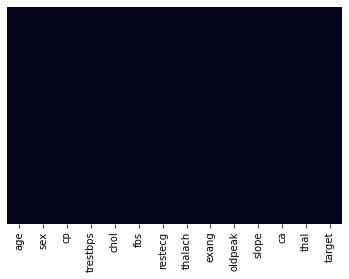

In [12]:
# Checking null values via visualization
sns.heatmap(df.isnull(), yticklabels= False, cbar= False)

In [13]:
# Imputing the missing Values with Mean
df['trestbps']=df['trestbps'].replace(0,np.NaN)
df['trestbps']=df['trestbps'].fillna((df['trestbps'].mean()))

df['fbs']=df['fbs'].replace(0,np.NaN)
df['fbs']=df['fbs'].fillna((df['fbs'].mean()))

df['restecg']=df['restecg'].replace(0,np.NaN)
df['restecg']=df['restecg'].fillna((df['restecg'].mean()))

df['thalach']=df['thalach'].replace(0,np.NaN)
df['thalach']=df['thalach'].fillna((df['thalach'].mean()))

df['exang']=df['exang'].replace(0,np.NaN)
df['exang']=df['exang'].fillna((df['exang'].mean()))

df['oldpeak']=df['oldpeak'].replace(0,np.NaN)
df['oldpeak']=df['oldpeak'].fillna((df['oldpeak'].mean()))

df['slope']=df['slope'].replace(0,np.NaN)
df['slope']=df['slope'].fillna((df['slope'].mean()))

df['ca']=df['ca'].replace(0,np.NaN)
df['ca']=df['ca'].fillna((df['ca'].mean()))

df['thal']=df['thal'].replace(0,np.NaN)
df['thal']=df['thal'].fillna((df['thal'].mean()))

In [14]:
# Checking tnull values again
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
# Check dataset again
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140.000000,260,1.0,1.0,112.000000,1,3.000000,2.000000,0,6.294118,2
1,44,1,4,130.000000,209,1.0,1.0,127.000000,0,1.828846,2.132653,0,6.294118,0
2,60,1,4,132.000000,218,1.0,1.0,140.000000,1,1.500000,3.000000,0,6.294118,2
3,55,1,4,142.000000,228,1.0,1.0,149.000000,1,2.500000,1.000000,0,6.294118,1
4,66,1,3,110.000000,213,1.0,2.0,99.000000,1,1.300000,2.000000,0,6.294118,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333,1.0,1.0,154.000000,0,1.828846,2.132653,0,6.294118,1
196,62,1,1,134.699301,139,1.0,1.0,122.795918,0,1.828846,2.132653,0,6.294118,0
197,55,1,4,122.000000,223,1.0,1.0,100.000000,0,1.828846,2.132653,0,6.000000,2
198,58,1,4,134.699301,385,1.0,2.0,122.795918,0,1.828846,2.132653,0,6.294118,0


In [16]:
# Remove some useless column
df=df.drop(['ca', "exang"], axis=1)

In [17]:
df.shape

(200, 12)

In [18]:
df['target']

0      2
1      0
2      2
3      1
4      0
      ..
195    1
196    0
197    2
198    0
199    1
Name: target, Length: 200, dtype: int64

In [19]:
df.groupby('target').size()

target
0    51
1    56
2    41
3    42
4    10
dtype: int64

In [20]:
df.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,thal
target,,,,,,,,,,,
0,2898,48,161,6716.286713,8754,51.0,63.050,6331.122449,86.309615,106.775510,317.647059
1,3224,53,204,7393.090909,9487,56.0,71.850,6925.346939,90.350000,116.581633,357.058824
2,2503,41,151,5581.594406,6059,41.0,47.150,5057.571429,79.361538,90.122449,255.705882
3,2623,42,148,5780.790210,8304,42.0,49.275,5052.551020,81.590385,87.520408,265.470588
4,622,10,37,1468.097902,1894,10.0,13.675,1192.591837,28.157692,25.530612,62.941176


In [21]:
df.size

2400

# Get some Statistics

In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,thal,target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,134.699301,172.490000,1.0,1.22500,122.795918,1.828846,2.132653,6.294118,1.520000
std,7.811697,0.171015,0.795701,15.581859,116.752497,0.0,0.32427,18.835692,0.627564,0.466331,0.526001,1.219441
min,35.000000,0.000000,1.000000,96.000000,0.000000,1.0,1.00000,69.000000,-0.500000,1.000000,3.000000,0.000000
25%,55.000000,1.000000,3.000000,126.000000,0.000000,1.0,1.00000,112.000000,1.575000,2.000000,6.294118,0.000000
50%,60.000000,1.000000,4.000000,134.699301,214.000000,1.0,1.22500,122.795918,1.828846,2.132653,6.294118,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.0,1.22500,130.000000,2.000000,2.132653,6.294118,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.0,2.00000,180.000000,4.000000,3.000000,7.000000,4.000000


In [23]:
df['target'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

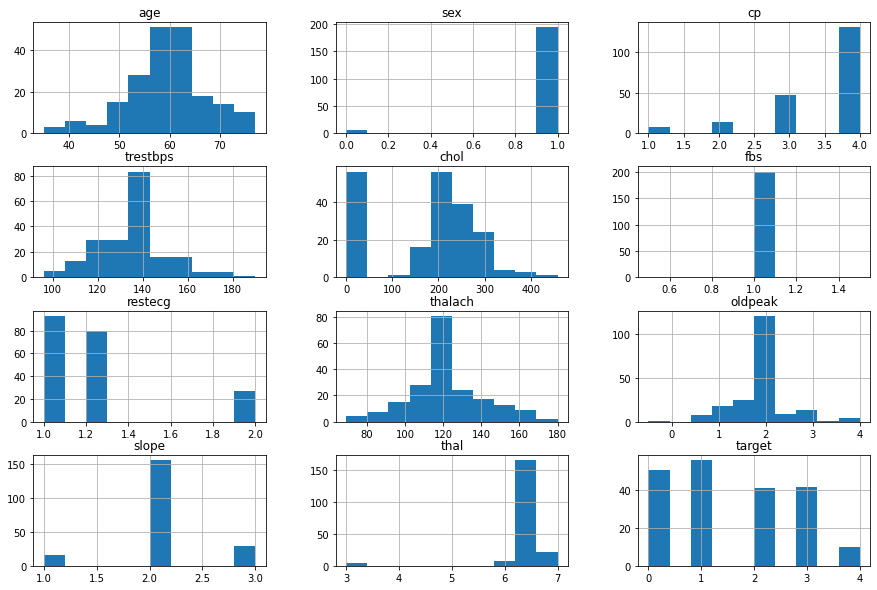

In [24]:
# using histogram for visualization
df.hist(figsize=(15,10))
plt.show()

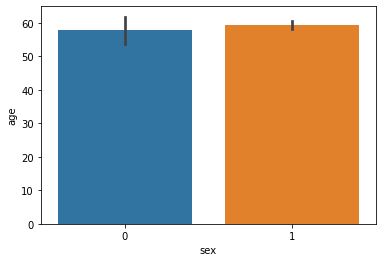

In [25]:
sns.barplot(x=df['sex'], y=df['age'])
plt.show()

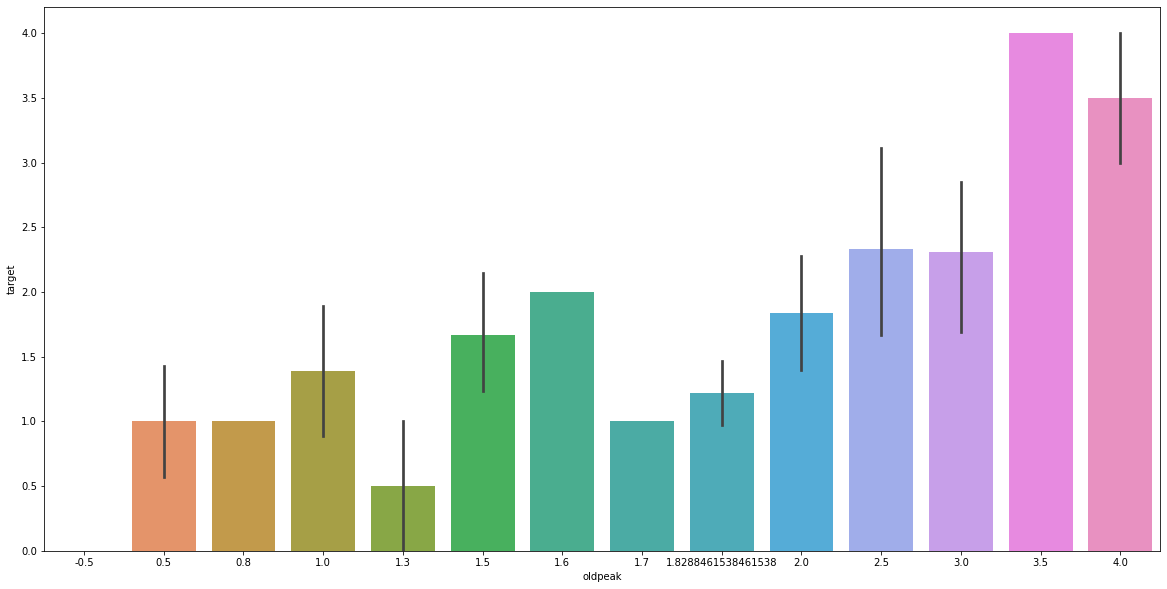

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['oldpeak'], y=df['target'])
plt.show()

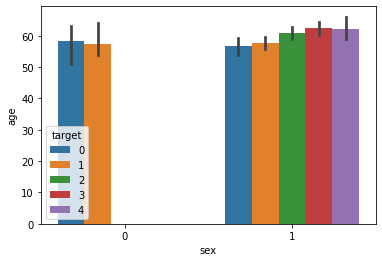

In [27]:
sns.barplot(x=df['sex'],y=df['age'],hue=df['target'])
plt.show()

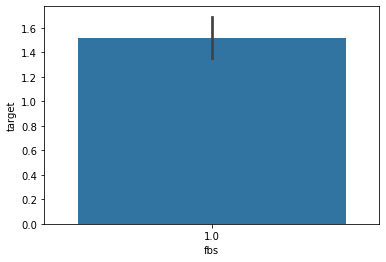

In [28]:
sns.barplot(x=df['fbs'], y=df['target'])
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

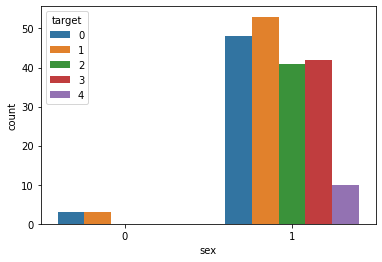

In [29]:
sns.countplot(x='sex',hue='target',data=df)

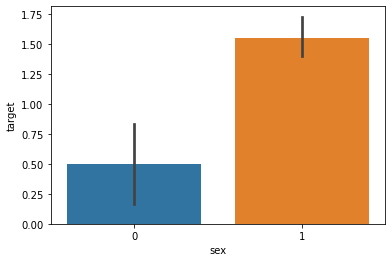

In [30]:
sns.barplot(x=df['sex'], y=df['target'])
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

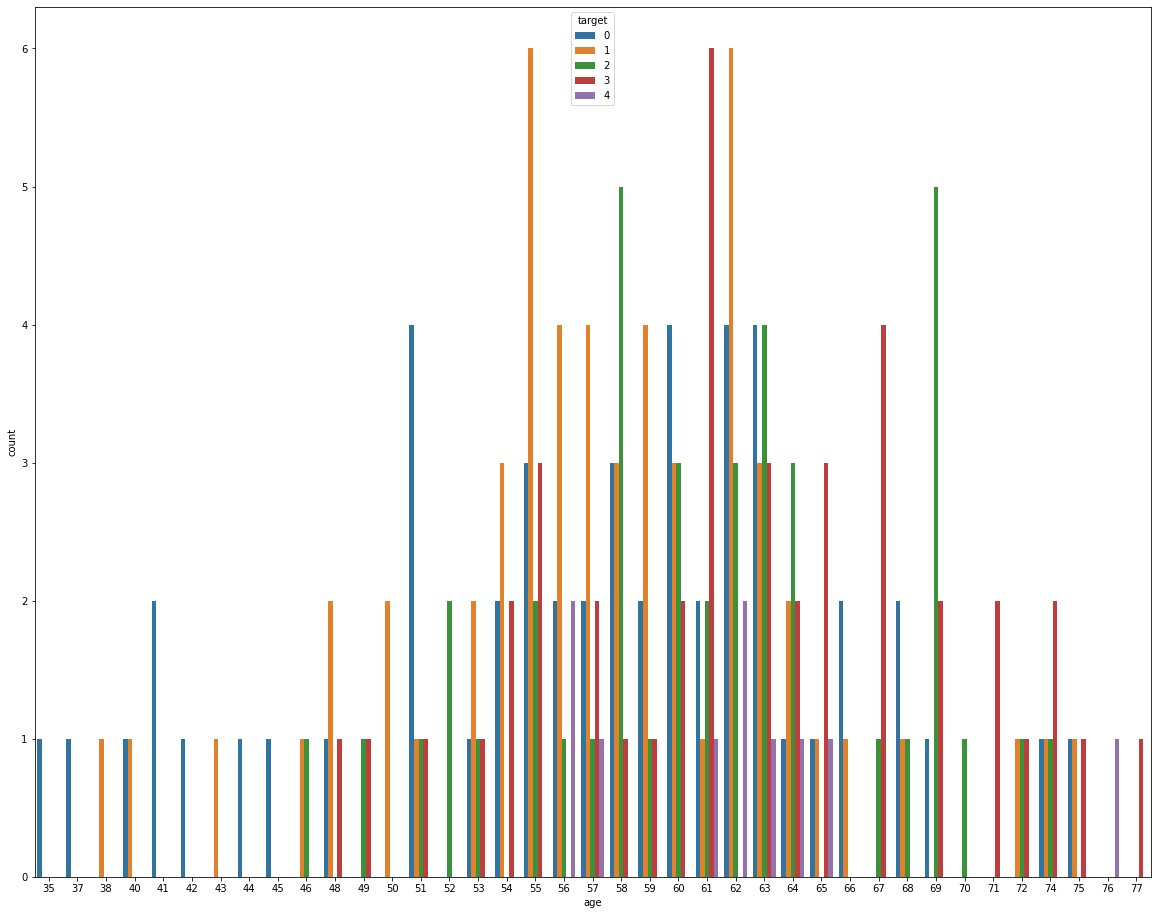

In [31]:
plt.figure(figsize=(20,16))
sns.countplot(x='age',hue='target',data=df)

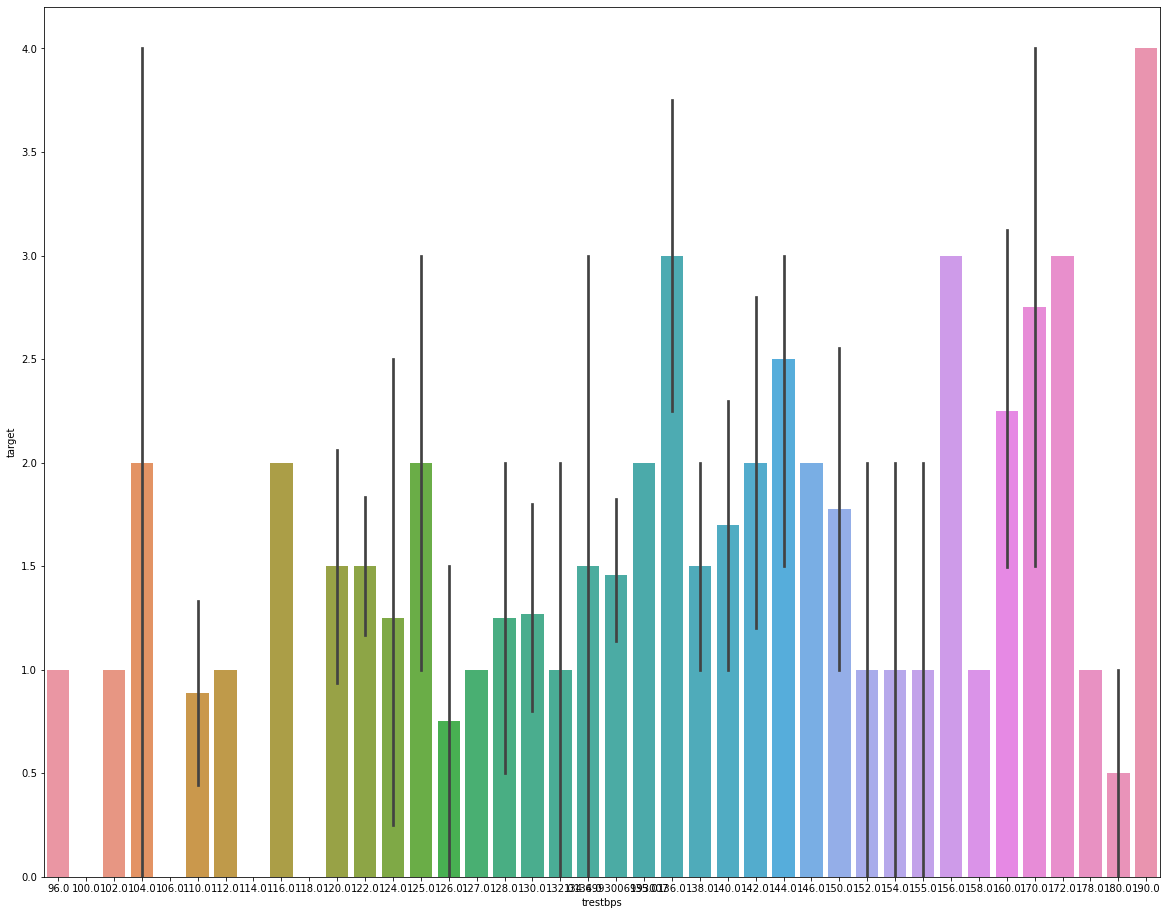

In [32]:
plt.figure(figsize=(20,16))
sns.barplot(x=df['trestbps'], y=df['target'])
plt.show()

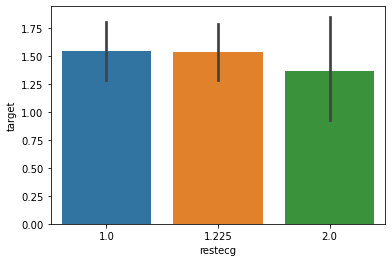

In [33]:
sns.barplot(x=df['restecg'], y=df['target'])
plt.show()

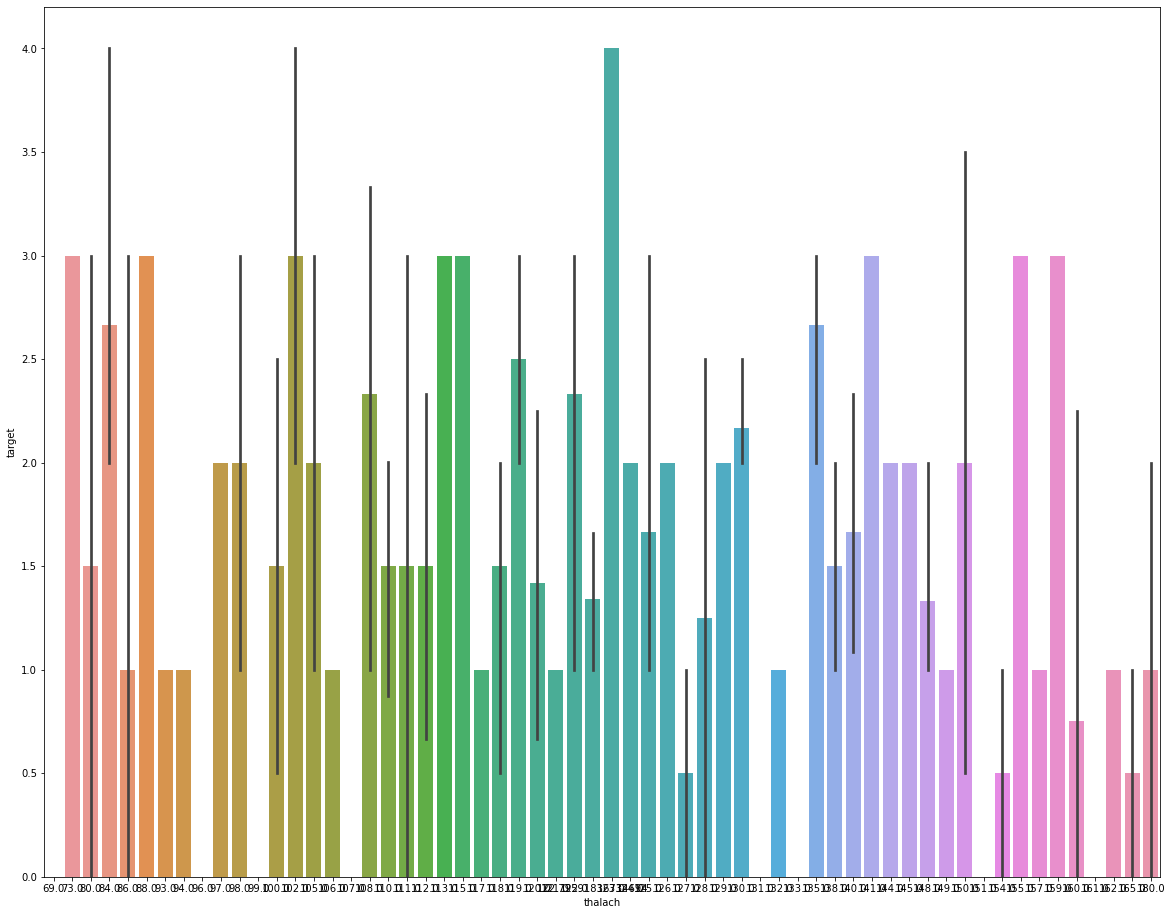

In [34]:
plt.figure(figsize=(20,16))
sns.barplot(x=df['thalach'], y=df['target'])
plt.show()

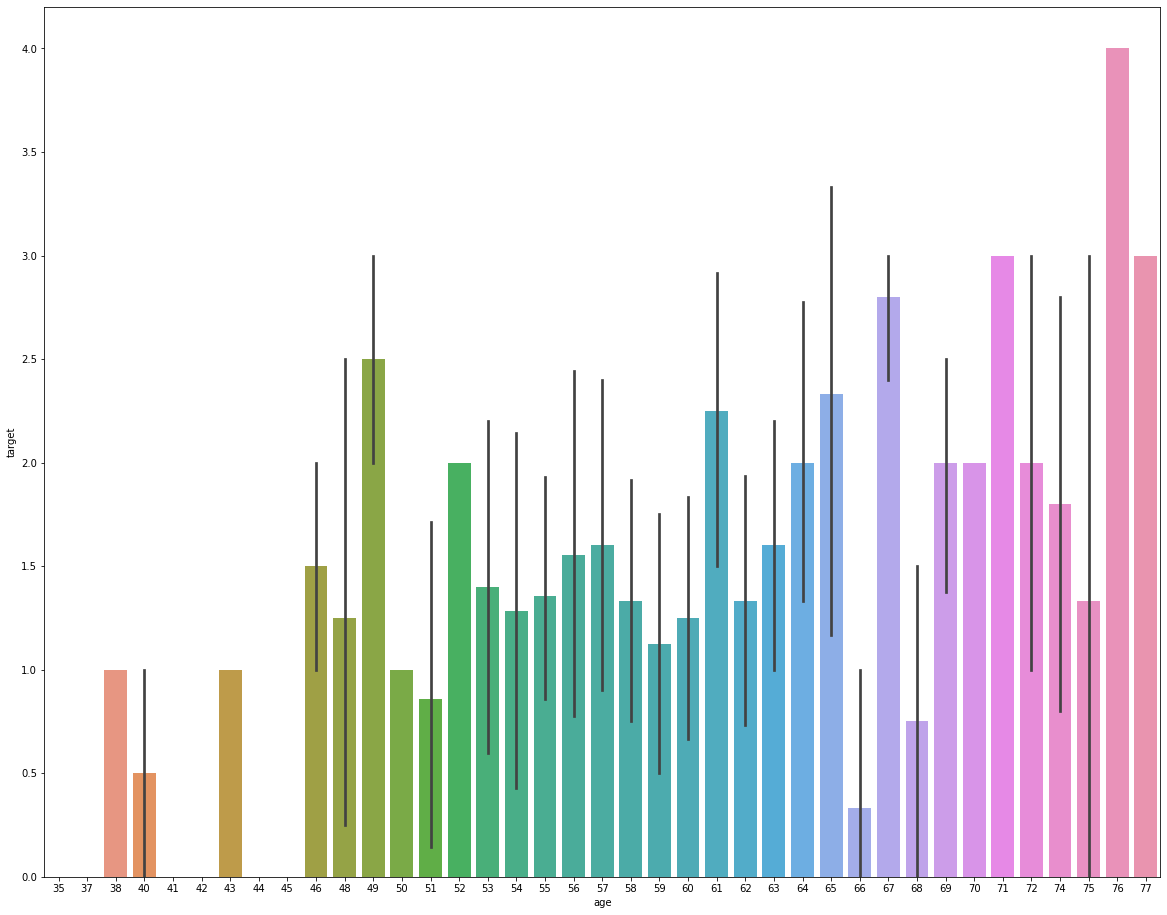

In [35]:
plt.figure(figsize=(20,16))
sns.barplot(x=df['age'], y=df['target'])
plt.show()

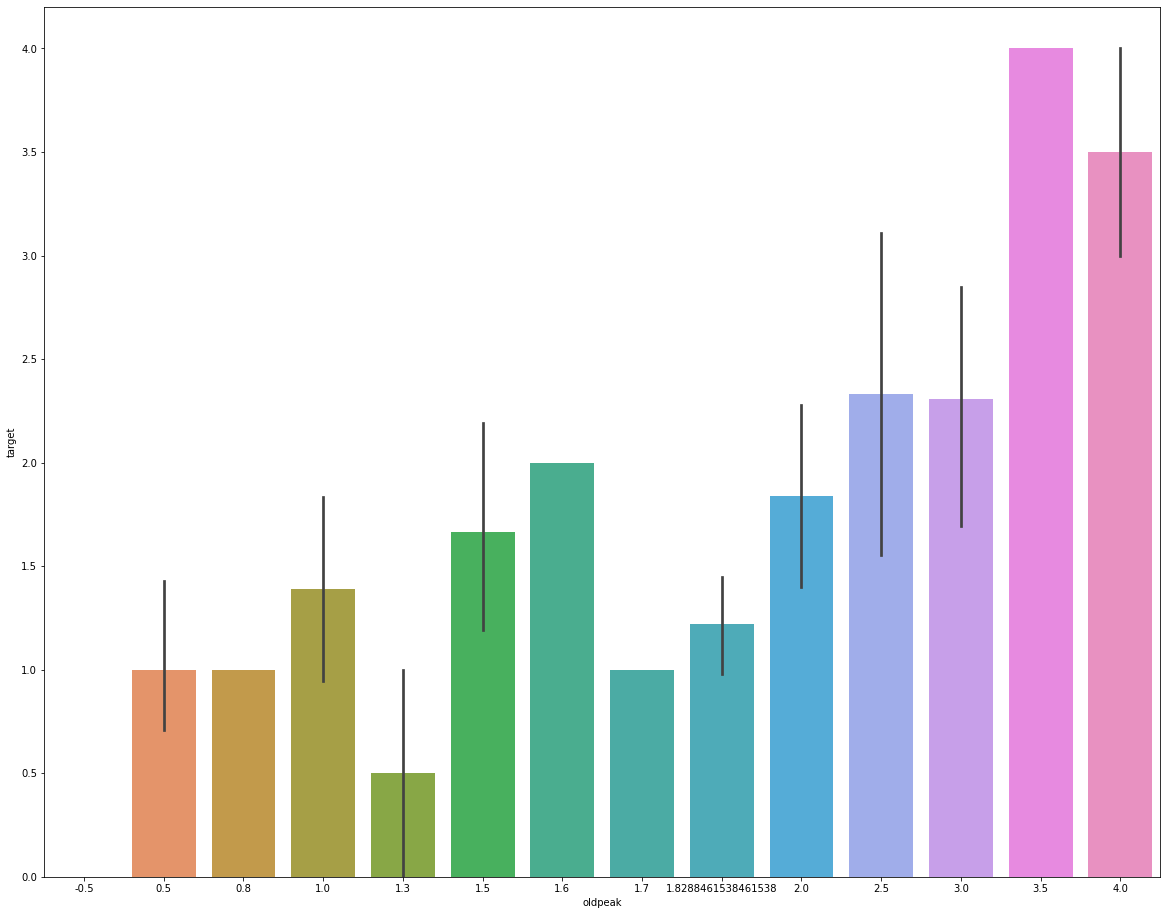

In [36]:
plt.figure(figsize=(20,16))
sns.barplot(x=df['oldpeak'], y=df['target'])
plt.show()

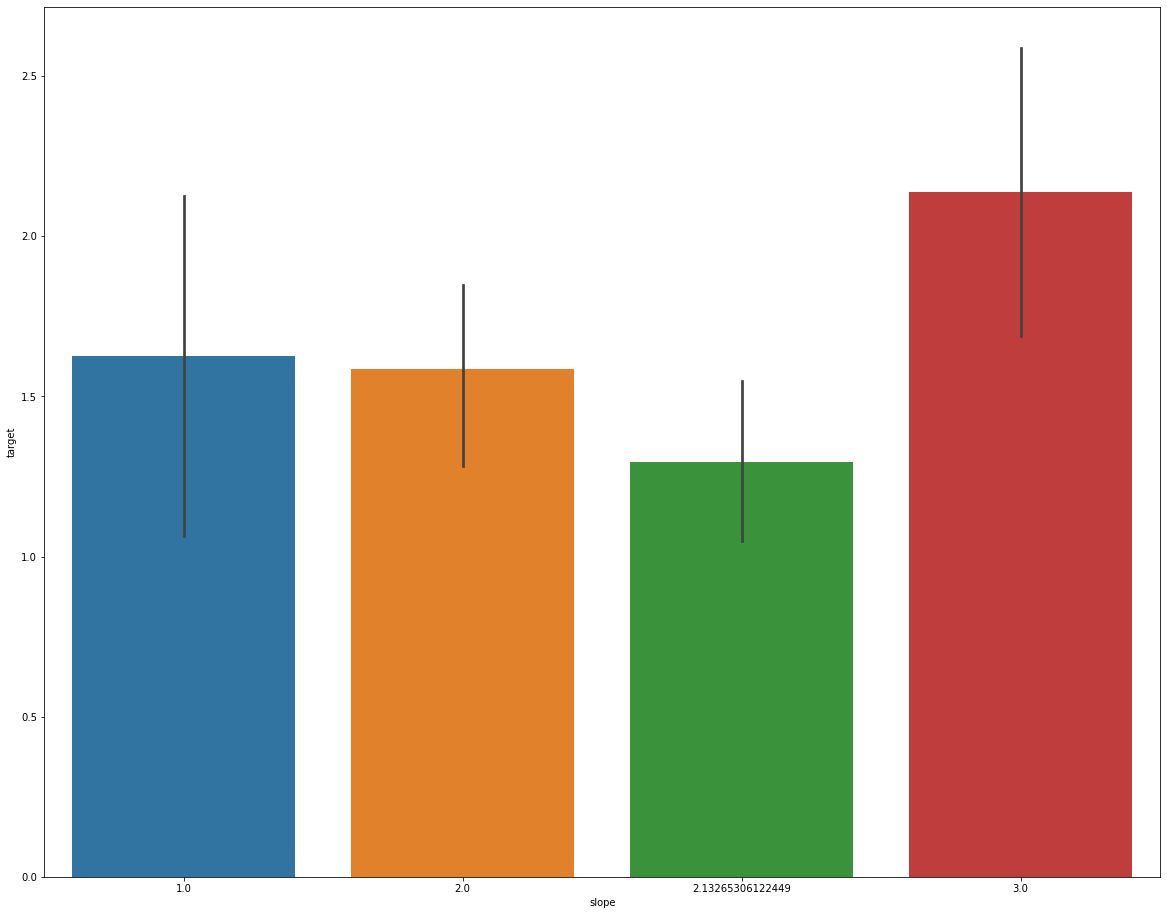

In [37]:
plt.figure(figsize=(20,16))
sns.barplot(x=df['slope'], y=df['target'])
plt.show()

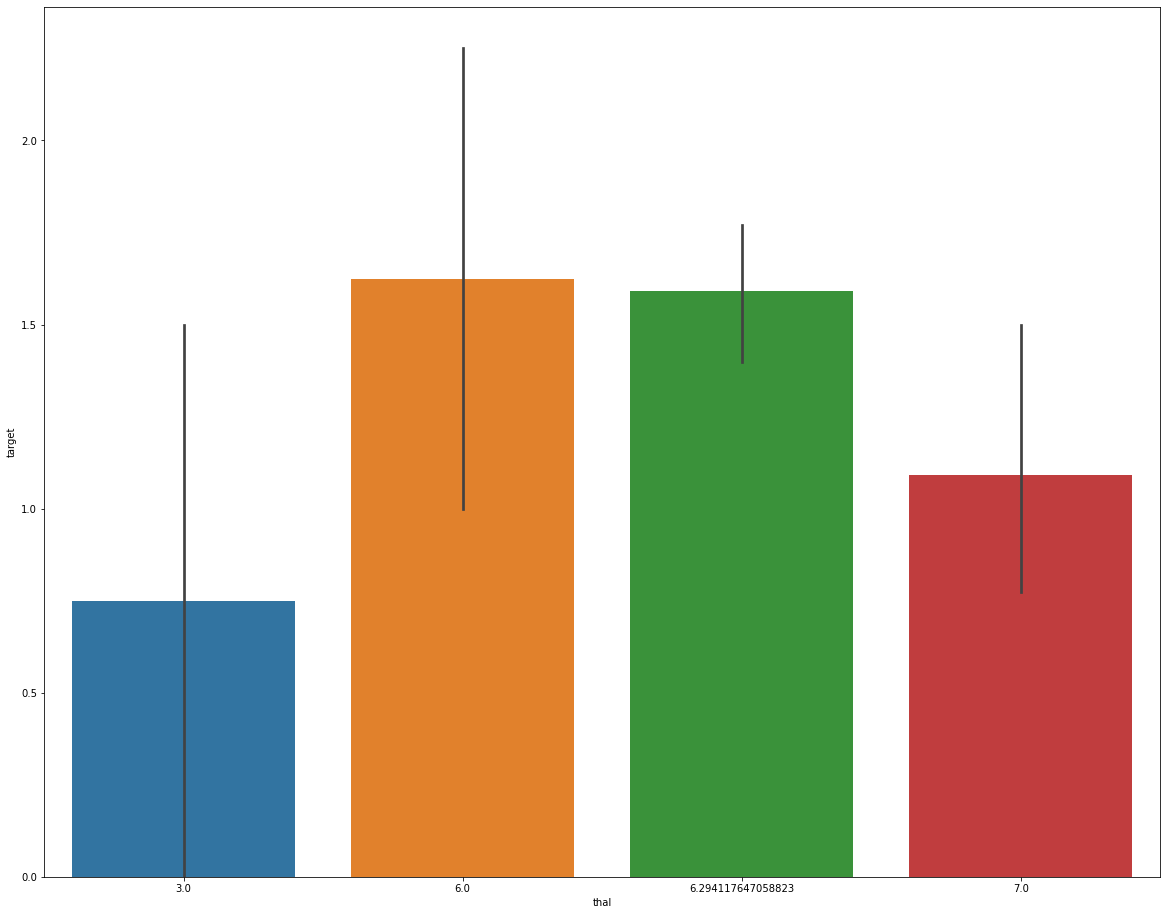

In [38]:
plt.figure(figsize=(20,16))
sns.barplot(x=df['thal'], y=df['target'])
plt.show()

<AxesSubplot:xlabel='thalach', ylabel='Density'>

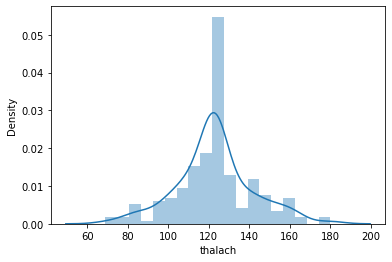

In [39]:
sns.distplot(df["thalach"])

<AxesSubplot:xlabel='chol', ylabel='Density'>

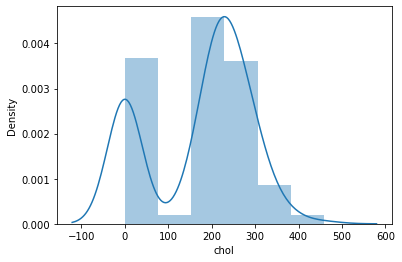

In [40]:
sns.distplot(df["chol"])

<AxesSubplot:xlabel='age', ylabel='Density'>

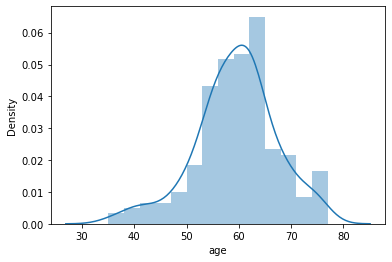

In [41]:
sns.distplot(df["age"])

<AxesSubplot:xlabel='sex', ylabel='Density'>

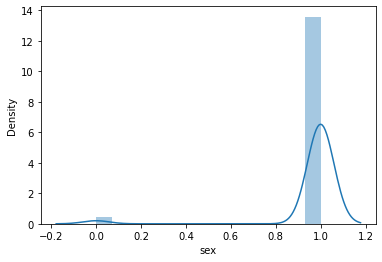

In [42]:
sns.distplot(df["sex"])

<AxesSubplot:xlabel='cp', ylabel='Density'>

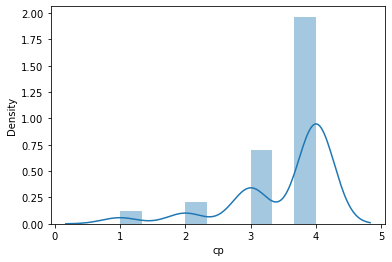

In [43]:
sns.distplot(df["cp"])

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

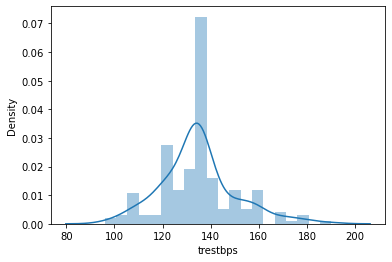

In [44]:
sns.distplot(df["trestbps"])

<AxesSubplot:xlabel='fbs', ylabel='Density'>

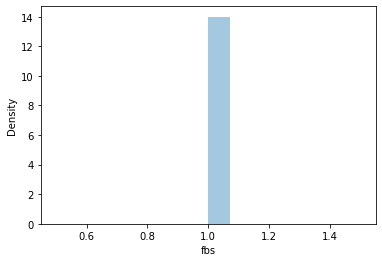

In [45]:
sns.distplot(df["fbs"])

<AxesSubplot:xlabel='restecg', ylabel='Density'>

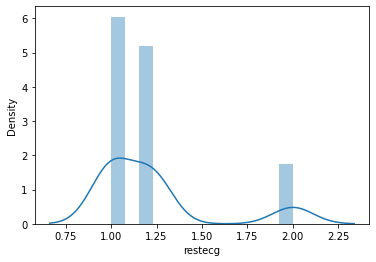

In [46]:
sns.distplot(df["restecg"])

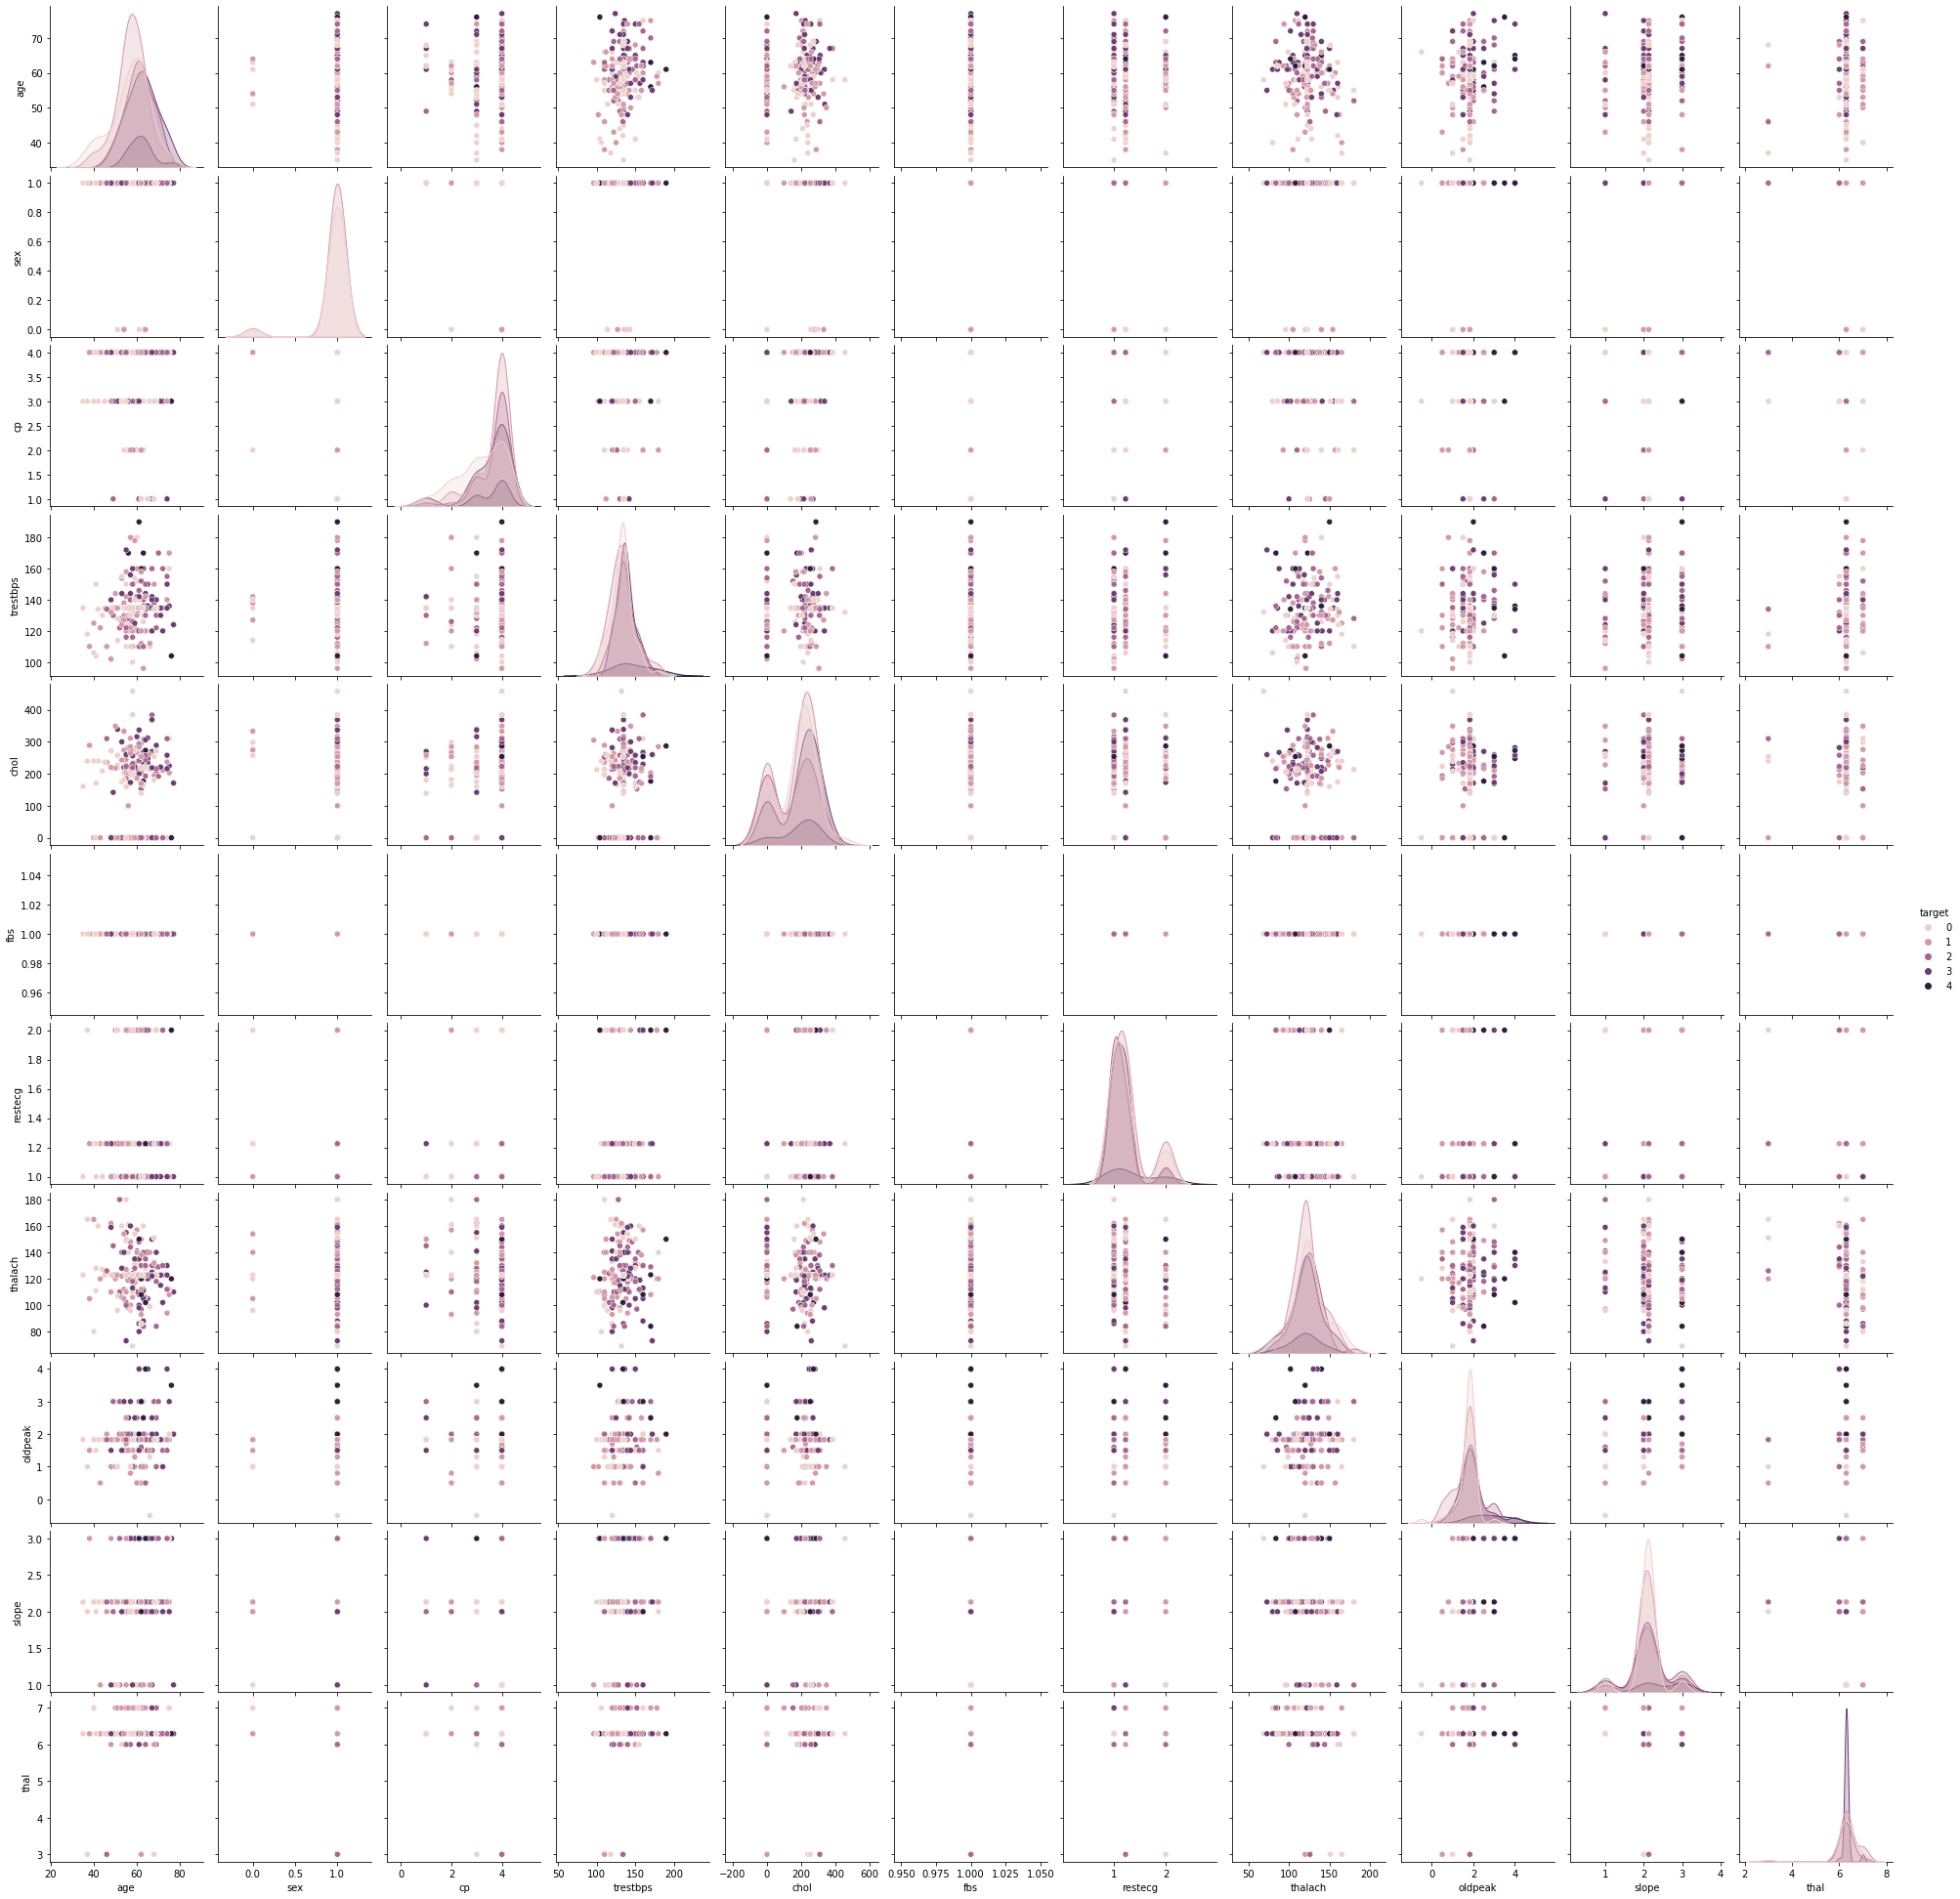

In [47]:
sns.pairplot(df,hue='target')

In [48]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,thal,target
0,63,1,4,140.0,260,1.0,1.0,112.0,3.000000,2.000000,6.294118,2
1,44,1,4,130.0,209,1.0,1.0,127.0,1.828846,2.132653,6.294118,0
2,60,1,4,132.0,218,1.0,1.0,140.0,1.500000,3.000000,6.294118,2
3,55,1,4,142.0,228,1.0,1.0,149.0,2.500000,1.000000,6.294118,1
4,66,1,3,110.0,213,1.0,2.0,99.0,1.300000,2.000000,6.294118,0


1    56
0    51
3    42
2    41
4    10
Name: target, dtype: int64


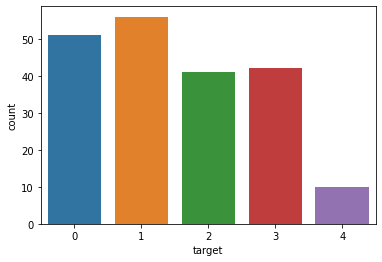

In [49]:
y = df["target"]

sns.countplot(y)

target_temp = df.target.value_counts()

print(target_temp)

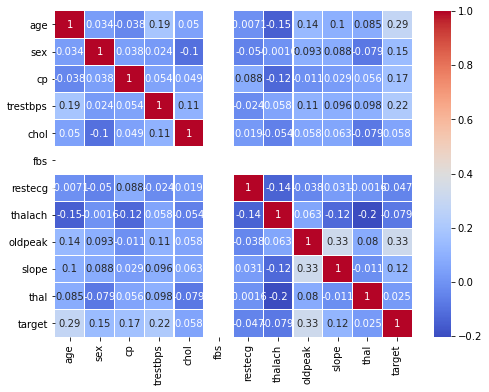

In [50]:
# create a correlation heatmap
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

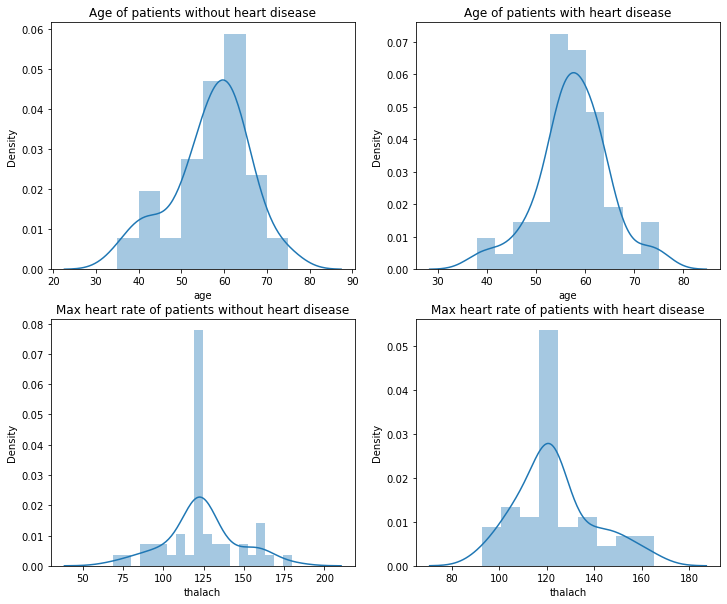

In [51]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

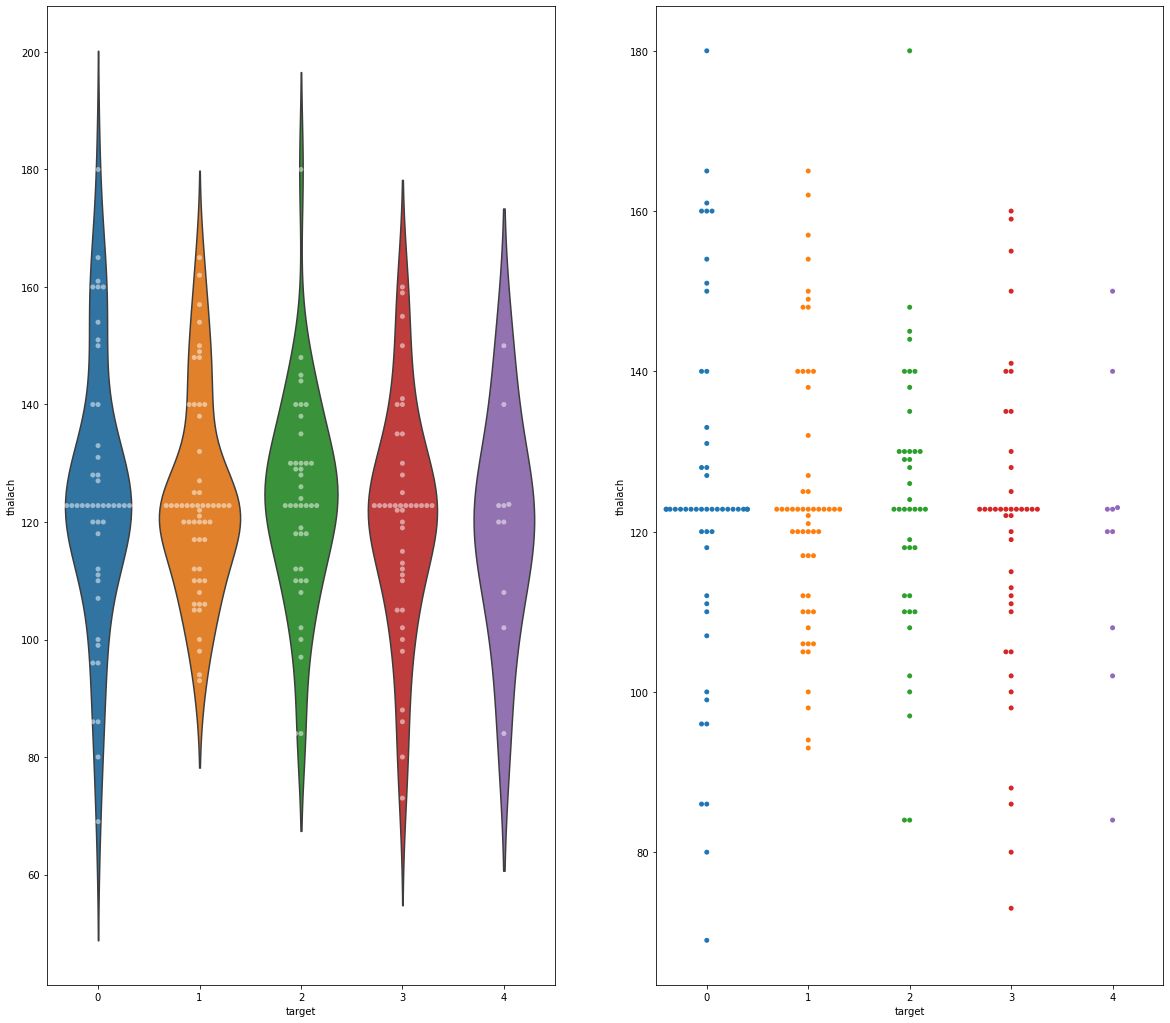

In [52]:
plt.figure(figsize=(20,18))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=df, inner=None)
sns.swarmplot(x="target", y="thalach", data=df, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=df)
plt.show()

In [53]:
#Checking skewness
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps    0.597868
chol       -0.469975
fbs         0.000000
restecg     1.713252
thalach     0.148515
oldpeak     0.572638
slope      -0.222767
thal       -4.724092
target      0.297393
dtype: float64
Total count of numeric features:  12
count of features which are significantly skewed:  6


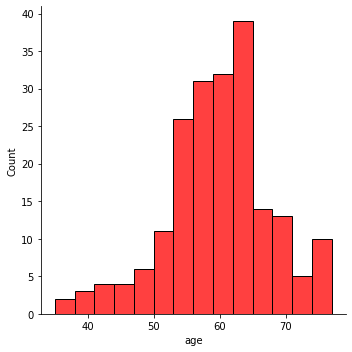

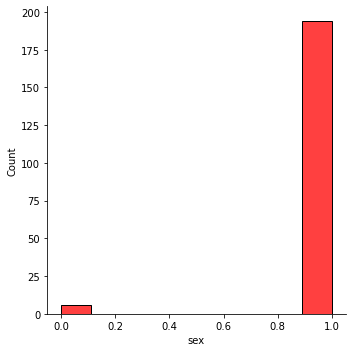

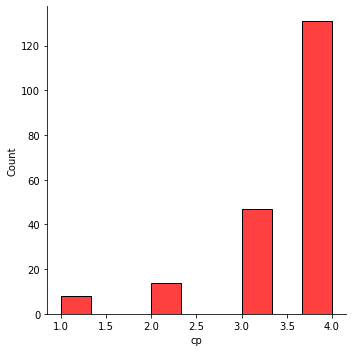

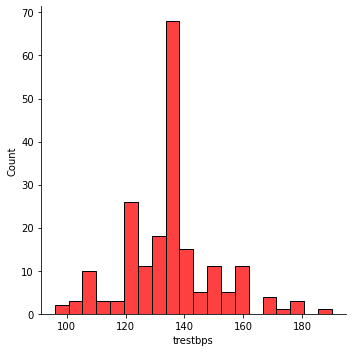

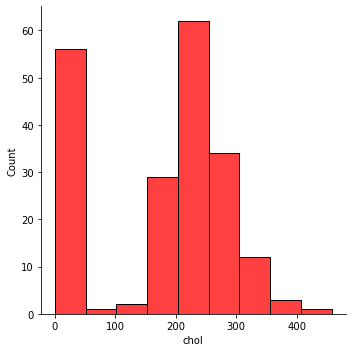

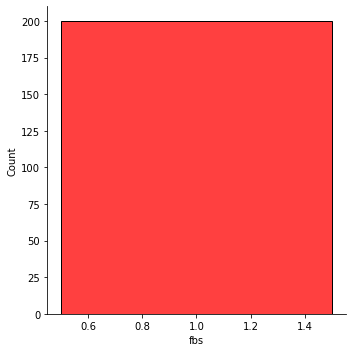

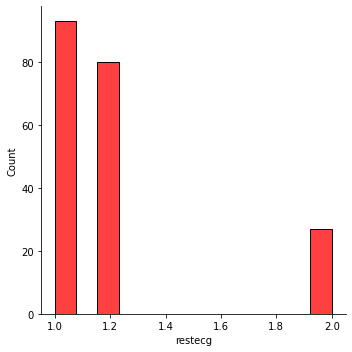

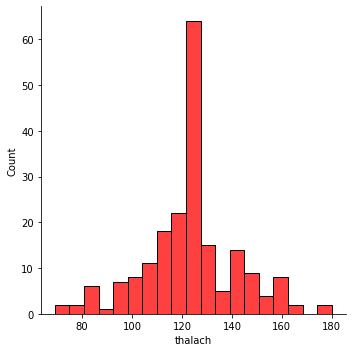

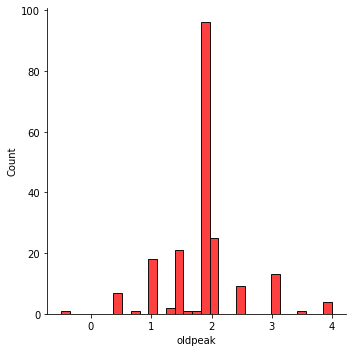

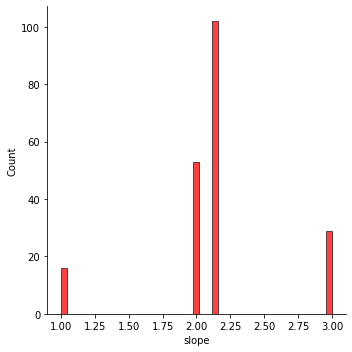

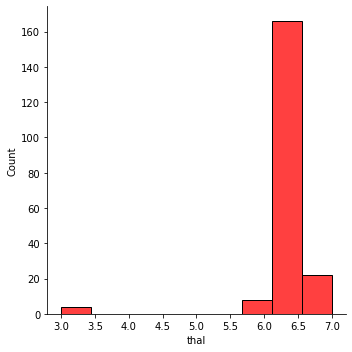

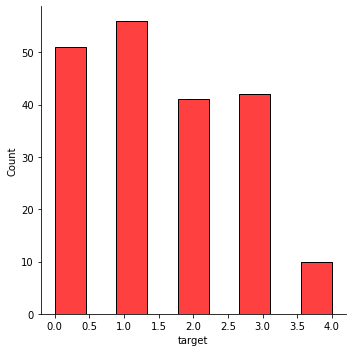

In [54]:
# To check the distribution of skewness
for col in df.describe().columns:
    sns.displot(df[col], color='r')
    plt.show()

In [55]:
#  treat the skewness 
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.log1p(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.square(df[index])

In [56]:
# checking skewness again
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

age        -0.404091
sex        -5.552105
cp         -1.167506
trestbps    0.135779
chol       -0.469975
fbs         0.000000
restecg     1.563792
thalach     0.148515
oldpeak     0.840800
slope      -0.222767
thal       -3.303107
target      0.297393
dtype: float64
Total count of numeric features:  12
count of features which are significantly skewed:  5


# Plotting outliers

Text(0, 0.5, 'Thalach Level')

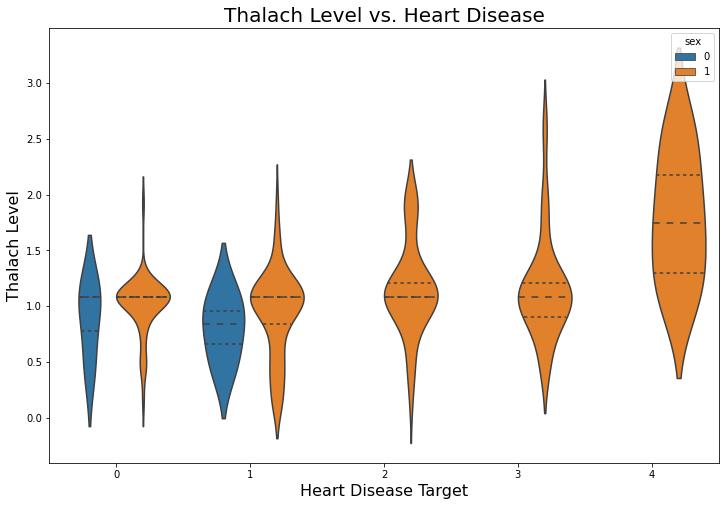

In [57]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= df )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

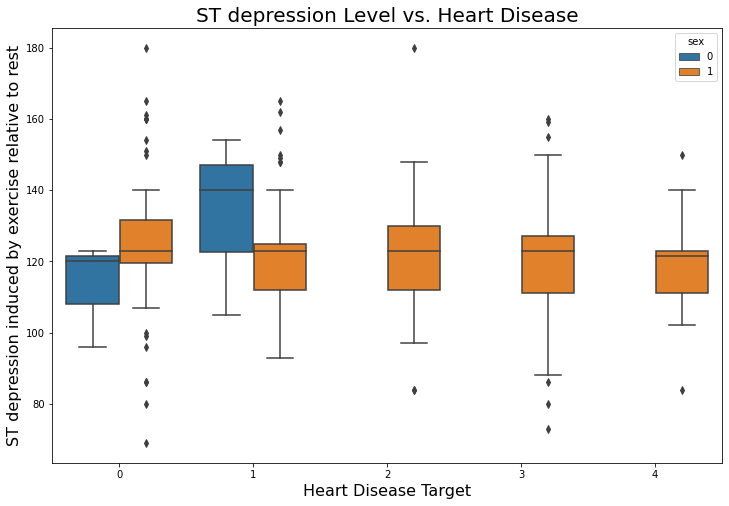

In [58]:
# Create Boxplots
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=df )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

# Filtering data by positive & negative Heart Disease patient

In [61]:
# Filtering data by POSITIVE Heart Disease patient
pos_df = df[df['target']==1]
pos_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,thal,target
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,57.571429,0.946429,13.750000,4.882714,169.410714,1.0,0.815049,123.666910,0.929068,2.081815,40.950939,1.0
std,7.203174,0.227208,4.174599,0.125080,115.333158,0.0,0.141894,16.552745,0.381007,0.449247,5.909020,0.0
min,38.000000,0.000000,1.000000,4.574711,0.000000,1.0,0.693147,93.000000,0.164402,1.000000,9.000000,1.0
25%,54.750000,1.000000,14.250000,4.808086,0.000000,1.0,0.693147,112.000000,0.803126,2.000000,39.615917,1.0
50%,57.500000,1.000000,16.000000,4.882773,207.000000,1.0,0.799757,122.795918,1.081327,2.132653,39.615917,1.0
75%,62.000000,1.000000,16.000000,4.916450,255.000000,1.0,0.799757,128.250000,1.081327,2.132653,39.615917,1.0
max,75.000000,1.000000,16.000000,5.198497,349.000000,1.0,1.098612,165.000000,1.921812,3.000000,49.000000,1.0


In [62]:
# Filtering data by NEGATIVE Heart Disease patient
neg_df = df[df['target']==0]
neg_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,thal,target
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.0,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,56.823529,0.941176,10.803922,4.882157,171.647059,1.0,0.794377,124.139656,1.004212,2.093637,39.264401,0.0
std,9.045896,0.237635,5.249837,0.109542,114.385633,0.0,0.141222,22.175911,0.264433,0.351748,6.814319,0.0
min,35.000000,0.000000,1.000000,4.615121,0.000000,1.0,0.693147,69.000000,0.164402,1.000000,9.000000,0.0
25%,52.000000,1.000000,9.000000,4.836250,69.500000,1.0,0.693147,119.000000,1.081327,2.132653,39.615917,0.0
50%,58.000000,1.000000,9.000000,4.910441,207.000000,1.0,0.799757,122.795918,1.081327,2.132653,39.615917,0.0
75%,62.500000,1.000000,16.000000,4.910441,240.000000,1.0,0.799757,129.500000,1.081327,2.132653,39.615917,0.0
max,75.000000,1.000000,16.000000,5.198497,458.000000,1.0,1.098612,180.000000,1.921812,3.000000,49.000000,0.0


In [63]:
print("(Positive Patients ST depression): " + str(pos_df['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_df['oldpeak'].mean()))

(Positive Patients ST depression): 0.9290679647547002
(Negative Patients ST depression): 1.0042122456727343


In [64]:
print("(Positive Patients thalach): " + str(pos_df['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_df['thalach'].mean()))

(Positive Patients thalach): 123.6669096209912
(Negative Patients thalach): 124.1396558623449


From comparing positive and negative patients we can see there are vast differences in means for many of our  Features. From examining the details, we can observe that positive patients experience heightened 8.1976 approx. heart rate achieved (thalach) average. In addition, positive patients exhibit higher amount of ST depression induced by exercise relative to rest (oldpeak) than negative patients.

# Machine Learning+ Predictive Analytics

# Prepare Data for Modeling

In [65]:
#Prepare Data for Modeling
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data set into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [66]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modeling /Training

In [67]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [68]:

dt=DecisionTreeClassifier()
parameters ={'criterion':['ginni','entropy'], 'splitter':['best','random']}
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')


sv=SVC()
parameters =[{'kernel':['linear','poly','rbf','sigmoid']} , {'gamma':['auto','scale']}]
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('\n')
sv=SVC()
parameters ={'gamma':['auto','scale']}
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

knn=KNeighborsClassifier()
parameters ={'algorithm':['auto','ball_tree','brute'],'leaf_size':[30],'n_jobs':[1,None],'metric_params':[None]}
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

{'criterion': 'entropy', 'splitter': 'best'}
*************************************


{'kernel': 'linear'}


{'gamma': 'auto'}
*************************************


{'algorithm': 'auto', 'leaf_size': 30, 'metric_params': None, 'n_jobs': 1}
*************************************




In [69]:
model=[DecisionTreeClassifier(criterion='entropy', splitter='best'),KNeighborsClassifier(algorithm='auto', leaf_size=30, metric_params=None, n_jobs=1),SVC(kernel='linear', gamma='auto')]

for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    
    print('Accuracy Report:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print("Classification Report:",classification_report(y_test,predm))
    print('*********************************************************************************************')
    print('\n')

Score of DecisionTreeClassifier(criterion='entropy') is: 1.0
Accuracy Report: 0.3
Confusion Matrix: [[3 6 0 1 0]
 [4 5 0 2 0]
 [1 1 0 2 0]
 [3 3 1 4 1]
 [0 1 2 0 0]]
Classification Report:               precision    recall  f1-score   support

           0       0.27      0.30      0.29        10
           1       0.31      0.45      0.37        11
           2       0.00      0.00      0.00         4
           3       0.44      0.33      0.38        12
           4       0.00      0.00      0.00         3

    accuracy                           0.30        40
   macro avg       0.21      0.22      0.21        40
weighted avg       0.29      0.30      0.29        40

*********************************************************************************************


Score of KNeighborsClassifier(n_jobs=1) is: 0.50625
Accuracy Report: 0.35
Confusion Matrix: [[6 3 1 0 0]
 [4 5 2 0 0]
 [1 1 1 1 0]
 [2 6 2 2 0]
 [0 1 1 1 0]]
Classification Report:               precision    recall  f1-score  

In [71]:
model=[DecisionTreeClassifier(criterion='entropy', splitter='best'),KNeighborsClassifier(algorithm='auto', leaf_size=30, metric_params=None, n_jobs=1),SVC(kernel='linear', gamma='auto')]

for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Score of:',m,'is:')
    print('score:',score)
    print('mean score:',score.mean())
    print("Standard Deviation:",score.std())
    print('***************************************************************************************')
    print('\n')

Score of: DecisionTreeClassifier(criterion='entropy') is:
score: [-0.63305879 -0.6        -0.88284519 -0.49058577]
mean score: -0.651622438114885
Standard Deviation: 0.1435324462537372
***************************************************************************************


Score of: KNeighborsClassifier(n_jobs=1) is:
score: [-0.42005112 -0.29655172 -0.9874477  -0.79131799]
mean score: -0.6238421340887215
Standard Deviation: 0.2778969946884953
***************************************************************************************


Score of: SVC(gamma='auto', kernel='linear') is:
score: [-0.34904857 -0.39310345 -0.43828452 -0.16370293]
mean score: -0.33603486543074335
Standard Deviation: 0.10437847901092154
***************************************************************************************




In [72]:
#using DecisionTreeClassifier model with best Results

dt=DecisionTreeClassifier(criterion='entropy', splitter='best')
dt.fit(x_train,y_train)
print('Score:',dt.score(x_train,y_train))
preddt=dt.predict(x_test)
print('\n')


print('Accuracy Report:',accuracy_score(y_test,preddt))
print('Confusion Matrix:',confusion_matrix(y_test,preddt))
print("Classification Report:",classification_report(y_test,preddt))

print('\n')

Score: 1.0


Accuracy Report: 0.25
Confusion Matrix: [[3 6 0 1 0]
 [6 3 0 2 0]
 [1 1 0 2 0]
 [3 3 1 4 1]
 [0 0 3 0 0]]
Classification Report:               precision    recall  f1-score   support

           0       0.23      0.30      0.26        10
           1       0.23      0.27      0.25        11
           2       0.00      0.00      0.00         4
           3       0.44      0.33      0.38        12
           4       0.00      0.00      0.00         3

    accuracy                           0.25        40
   macro avg       0.18      0.18      0.18        40
weighted avg       0.25      0.25      0.25        40





# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
parameters ={'criterion':['gini','entropy'], 'n_estimators':[100,200,300]}
rf=RandomForestClassifier()
clf =GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'n_estimators': 200}


In [75]:
rf=RandomForestClassifier(criterion='gini', n_estimators=200)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
preddtc=rf.predict(x_test)
print('\n')


print('Accuracy Report:',accuracy_score(y_test,predm))
print('Confusion Matrix:',confusion_matrix(y_test,predm))
print("Classification Report:",classification_report(y_test,predm))

print('\n')

Score: 1.0


Accuracy Report: 0.325
Confusion Matrix: [[5 4 1 0 0]
 [4 5 2 0 0]
 [1 2 0 1 0]
 [2 2 4 3 1]
 [0 2 0 1 0]]
Classification Report:               precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.33      0.45      0.38        11
           2       0.00      0.00      0.00         4
           3       0.60      0.25      0.35        12
           4       0.00      0.00      0.00         3

    accuracy                           0.33        40
   macro avg       0.27      0.24      0.24        40
weighted avg       0.38      0.33      0.33        40





# Gradient Boosting Classifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'loss': ['deviance', 'exponential'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse','mae']}
gbr=GradientBoostingClassifier()
clf =GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'deviance', 'n_estimators': 50}


In [77]:
gbr=GradientBoostingClassifier(criterion='friedman_mse', loss='deviance', n_estimators=50)
gbr.fit(x_train,y_train)
print('Score:',gbr.score(x_train,y_train))
preddtc=gbr.predict(x_test)
print('\n')


print('Accuracy Report:',accuracy_score(y_test,predm))
print('Confusion Matrix:',confusion_matrix(y_test,predm))
print("Classification Report:",classification_report(y_test,predm))

print('\n')

Score: 0.9625


Accuracy Report: 0.325
Confusion Matrix: [[5 4 1 0 0]
 [4 5 2 0 0]
 [1 2 0 1 0]
 [2 2 4 3 1]
 [0 2 0 1 0]]
Classification Report:               precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.33      0.45      0.38        11
           2       0.00      0.00      0.00         4
           3       0.60      0.25      0.35        12
           4       0.00      0.00      0.00         3

    accuracy                           0.33        40
   macro avg       0.27      0.24      0.24        40
weighted avg       0.38      0.33      0.33        40





As per above machine learning algorithum , the best model is Decision Tree Classifier because of maximum  accuracy score

In [79]:
# Save the best Model DecisionTreeClassifier
import pickle
pickle.dump(dt,open('Heart_disease.pkl','wb'))